In [53]:
import librosa
from matplotlib import pyplot as plt
import torchvision.transforms as VT
from serina import SoundDataset, vision_transform_without_resize, waveform_to_mel_spectrogram, standardize, SAMPLE_RATE,waveform_to_spectrogram

In [54]:
class CutSoundDataset(SoundDataset):
    def __init__(self, start=0, end=1):
        super().__init__(start, end)

    def __len__(self):
        return super().__len__() * 2

    def __getitem__(self, item):
        real = int(item / 2)
        offset = item % 2
        # waveform,
        waveform, sample_rate, file_path, category = self.get_raw_info(real)
        # vision_transform_without_resize(waveform)
        # waveform = standardize(waveform, sample_rate, SAMPLE_RATE)
        spec = waveform_to_spectrogram(waveform, sample_rate)
        return spec, sample_rate,file_path


ds = CutSoundDataset()

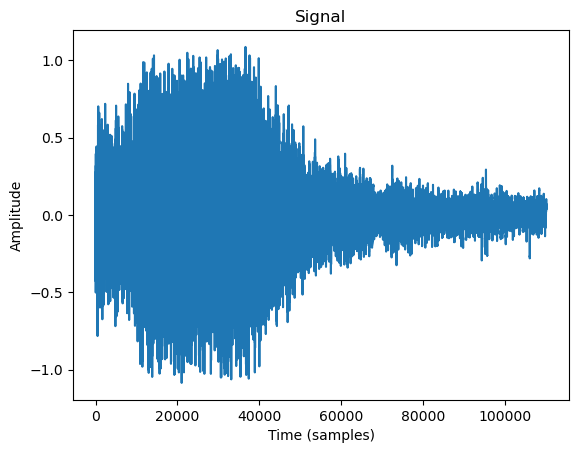

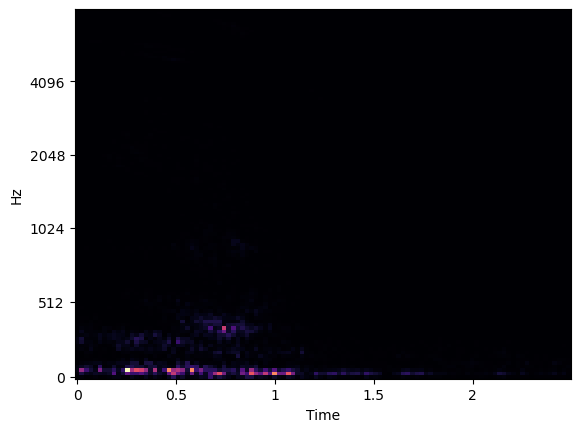

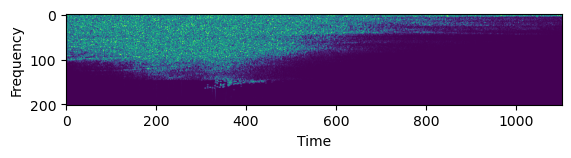

In [56]:
spec,sr,path = ds[0]

y, sr = librosa.load(path)
_,ax3 = plt.subplots()
ax3.plot(y);
ax3.set_title('Signal');
ax3.set_xlabel('Time (samples)');
ax3.set_ylabel('Amplitude');


_,ax4 = plt.subplots()
mel_spect = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=2048, hop_length=1024)
# mel_spect = librosa.power_to_db(spect, ref=np.max)
librosa.display.specshow(mel_spect, y_axis='mel', fmax=8000, x_axis='time',ax=ax4);

fig, ax2 = plt.subplots()
# ax2.set_title("Raw Specturm")
# plt.title("Spectrogram")
ax2.set_xlabel("Time")
ax2.set_ylabel("Frequency")
# plt.colorbar(format='%+2.0f dB')
# m = waveform_to_mel_spectrogram(spec, sr)
ax2.imshow(VT.ToPILImage()(spec))
# ax2.imshow(spec)